In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('food_orders_new_delhi.csv')

In [3]:
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


# Data Cleaning

### Change the data type of the date and time column from object to Date and time

In [5]:
df['Order Date and Time'] = pd.to_datetime(df['Order Date and Time'])
df['Delivery Date and Time'] = pd.to_datetime(df['Delivery Date and Time'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1000 non-null   int64         
 1   Customer ID             1000 non-null   object        
 2   Restaurant ID           1000 non-null   object        
 3   Order Date and Time     1000 non-null   datetime64[ns]
 4   Delivery Date and Time  1000 non-null   datetime64[ns]
 5   Order Value             1000 non-null   int64         
 6   Delivery Fee            1000 non-null   int64         
 7   Payment Method          1000 non-null   object        
 8   Discounts and Offers    815 non-null    object        
 9   Commission Fee          1000 non-null   int64         
 10  Payment Processing Fee  1000 non-null   int64         
 11  Refunds/Chargebacks     1000 non-null   int64         
dtypes: datetime64[ns](2), int64(6), object(4)
memory 

In [7]:
df['Discounts and Offers'].fillna("No Discounts",inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1000 non-null   int64         
 1   Customer ID             1000 non-null   object        
 2   Restaurant ID           1000 non-null   object        
 3   Order Date and Time     1000 non-null   datetime64[ns]
 4   Delivery Date and Time  1000 non-null   datetime64[ns]
 5   Order Value             1000 non-null   int64         
 6   Delivery Fee            1000 non-null   int64         
 7   Payment Method          1000 non-null   object        
 8   Discounts and Offers    1000 non-null   object        
 9   Commission Fee          1000 non-null   int64         
 10  Payment Processing Fee  1000 non-null   int64         
 11  Refunds/Chargebacks     1000 non-null   int64         
dtypes: datetime64[ns](2), int64(6), object(4)
memory 

### We are Analyzing the Cost and Profit of food deliveries, so we don't need the object features and the date and time features

In [9]:
df['Refunds/Chargebacks'].value_counts()

Refunds/Chargebacks
0      715
100    105
50      92
150     88
Name: count, dtype: int64

In [10]:
df['Discounts and Offers'].value_counts()

Discounts and Offers
10%             233
50 off Promo    201
15% New User    198
No Discounts    185
5% on App       183
Name: count, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1000 non-null   int64         
 1   Customer ID             1000 non-null   object        
 2   Restaurant ID           1000 non-null   object        
 3   Order Date and Time     1000 non-null   datetime64[ns]
 4   Delivery Date and Time  1000 non-null   datetime64[ns]
 5   Order Value             1000 non-null   int64         
 6   Delivery Fee            1000 non-null   int64         
 7   Payment Method          1000 non-null   object        
 8   Discounts and Offers    1000 non-null   object        
 9   Commission Fee          1000 non-null   int64         
 10  Payment Processing Fee  1000 non-null   int64         
 11  Refunds/Chargebacks     1000 non-null   int64         
dtypes: datetime64[ns](2), int64(6), object(4)
memory 

In [12]:
data = df[['Order Value','Delivery Fee','Commission Fee','Payment Processing Fee','Refunds/Chargebacks']]

In [13]:
# Extracting the discount Amount
import re
def discount_amount(x):
    if bool(re.search(r'\d',x['Discounts and Offers'])):
        return int(re.findall(r'\d+',x['Discounts and Offers'])[0])*0.01*x['Order Value']
    else:
        return 0

In [14]:
data['Discount'] = df.apply(discount_amount, axis=1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_7600\631877294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Discount'] = df.apply(discount_amount, axis=1)


### The Revenue is only from the Commission Fee from the Resturants and 

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order Value             1000 non-null   int64  
 1   Delivery Fee            1000 non-null   int64  
 2   Commission Fee          1000 non-null   int64  
 3   Payment Processing Fee  1000 non-null   int64  
 4   Refunds/Chargebacks     1000 non-null   int64  
 5   Discount                1000 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 47.0 KB


In [16]:
data['Total Cost'] = data['Delivery Fee'] + data['Payment Processing Fee'] + data['Refunds/Chargebacks'] + data['Discount']

C:\Users\Dell\AppData\Local\Temp\ipykernel_7600\1518724495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Total Cost'] = data['Delivery Fee'] + data['Payment Processing Fee'] + data['Refunds/Chargebacks'] + data['Discount']


In [17]:
data['Profit'] = data['Commission Fee'] - data['Total Cost']

C:\Users\Dell\AppData\Local\Temp\ipykernel_7600\2154534427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Profit'] = data['Commission Fee'] - data['Total Cost']


In [18]:
Total_orders = data.shape[0]

In [19]:
Total_order_value = data['Order Value'].sum()

In [20]:
Total_revenue = data['Commission Fee'].sum()

In [21]:
Total_cost = data['Total Cost'].sum()

In [22]:
Total_profits = data['Profit'].sum()

In [23]:
metrics = {
    "Total Orders": Total_orders,
    "Total Revenue": Total_revenue,
    "Total Cost": Total_cost,
    "Total Profits": Total_profits
}

In [24]:
metrics

{'Total Orders': 1000,
 'Total Revenue': 126990,
 'Total Cost': 261009.84999999998,
 'Total Profits': -134019.85}

In [25]:
import matplotlib.pyplot as plt

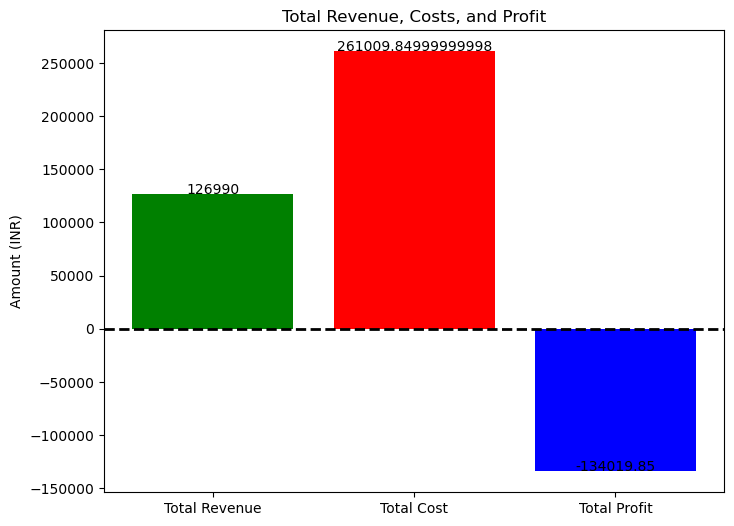

In [26]:
totals = ['Total Revenue', 'Total Cost', 'Total Profit']
values = [Total_revenue, Total_cost, Total_profits]
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.text(i,values[i],str(values[i]), ha='center')
plt.bar(totals, values, color=['green', 'red', 'blue'])
plt.axhline(0,color='black', linestyle='dashed', linewidth=2)
plt.title('Total Revenue, Costs, and Profit')
plt.ylabel('Amount (INR)')
plt.show()

The above Bar Plot suggets that we got a loss of 134,019 

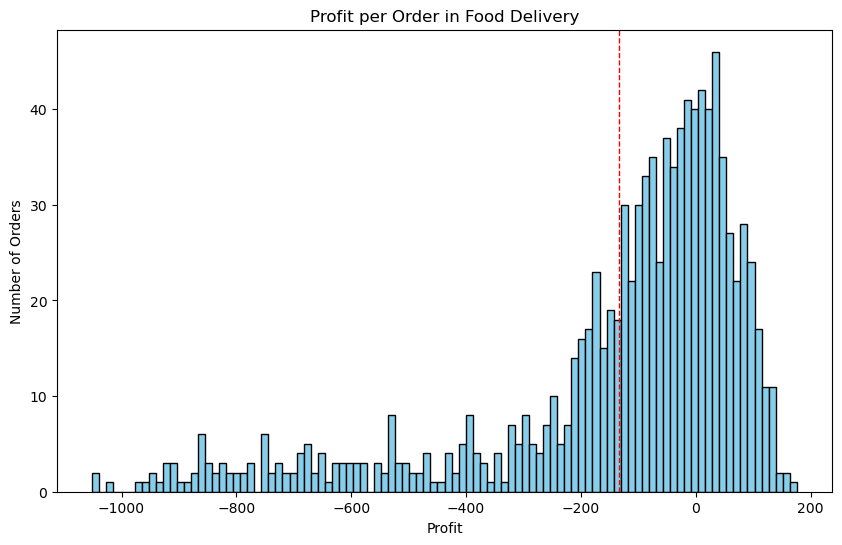

In [27]:
plt.figure(figsize=(10, 6))                     #Histogram to understand the profit distribution
plt.hist(data['Profit'], bins=100, color='skyblue', edgecolor='black')
plt.title('Profit per Order in Food Delivery')
plt.xlabel('Profit')
plt.ylabel('Number of Orders')
plt.axvline(data['Profit'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.show()

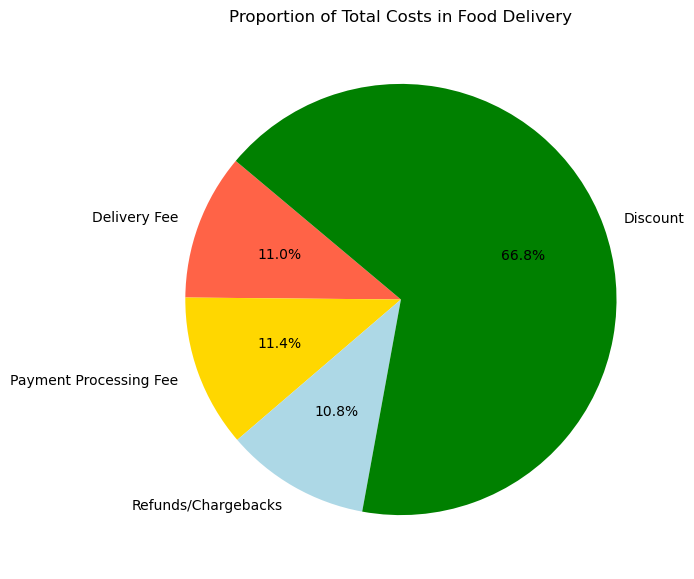

In [28]:
costs_breakdown = data[['Delivery Fee', 'Payment Processing Fee', 'Refunds/Chargebacks','Discount']].sum()
plt.figure(figsize=(7, 7))
plt.pie(costs_breakdown, labels=costs_breakdown.index, autopct='%1.1f%%', startangle=140, colors=['tomato', 'gold', 'lightblue','green'])
plt.title('Proportion of Total Costs in Food Delivery')
plt.show()

The above bar chart suggest that the discount is the major couse for the loss as the discount accouonts for 2/3rd of the total loss

# Biulding a New strategy to increase the profitability of orders

### We'll use two approach one is to increase the Total revenue and by reducing the loss

In [29]:
#The average commisssion fee 
(df['Commission Fee']/df['Order Value']).mean()*100

19.750890168545332

The Average Commission Fee Charged to the resturants is around 20%

In [30]:
#Profitable Orders
Profitable_orders = data[data['Profit']>0]

In [31]:
Profitable_orders.describe()

,Order Value,Delivery Fee,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount,Total Cost,Profit
count,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000
mean,850.877301,25.828221,146.809816,28.674847,5.674847,32.091411,92.269325,54.540491
std,533.414294,17.162247,37.439683,11.509933,19.374967,35.656105,38.624112,38.543102
min,104.000000,0.000000,55.000000,10.000000,0.000000,0.000000,16.000000,0.050000
25%,372.000000,20.000000,119.000000,19.000000,0.000000,0.000000,62.000000,21.850000
50%,793.000000,30.000000,153.000000,28.000000,0.000000,20.650000,85.450000,46.200000
75%,1233.250000,40.000000,179.000000,37.750000,0.000000,58.775000,121.225000,82.500000
max,1995.000000,50.000000,200.000000,50.000000,150.000000,157.300000,185.300000,176.000000


In [32]:
#The average commisssion fee for profitable orders
(Profitable_orders['Commission Fee']/Profitable_orders['Order Value']).mean()*100

31.59734746146822

The Average Commission Fee Charged to the resturants on tyhe profitable orders is around 31%

On Googling the average commission fees charged to the resturant in between 15 to 25 percent

So for now we will take the Commission fee for all the orders as 20%,  as it is the mean commission fee for all the orders and is inbetween the average commission fees charged to the resturants

In [33]:
#The average Discount percentage on all the profitable orders
(Profitable_orders['Discount']/Profitable_orders['Order Value']).mean()*100

5.7975460122699385

The Average Discount offered on the profitable orders is around 6%

# Simulate profitability with recommended discounts and commissions

In [34]:
import seaborn as sns

In [35]:
commission = [30,25,20,15] #Taking a range of commission percent from 30% to 15%
discount = [6,8,10] #Taking a range of discount percent from 6% to 10% with interval of 2

In [36]:
stimulated_data = pd.DataFrame() #Creating an empty Dataframe

In [37]:
for i in range(len(commission)):
    for j in range(len(discount)):
        stimulated_data[f'Simulated Commission Fee ({commission[i]}% and {discount[j]}%)'] = data['Order Value'] * (commission[i] / 100)
        stimulated_data[f'Simulated Discount Amount ({commission[i]}% and {discount[j]}%)'] = data['Order Value'] * (discount[j] / 100)
        stimulated_data[f'Simulated Total Cost ({commission[i]}% and {discount[j]}%)'] = data['Delivery Fee'] + data['Payment Processing Fee'] + data['Refunds/Chargebacks'] + stimulated_data[f'Simulated Discount Amount ({commission[i]}% and {discount[j]}%)']
        stimulated_data[f'Simulated Profit ({commission[i]}% and {discount[j]}%)'] = stimulated_data[f'Simulated Commission Fee ({commission[i]}% and {discount[j]}%)'] -  stimulated_data[f'Simulated Total Cost ({commission[i]}% and {discount[j]}%)']


## Plotting the various combination of commission and discount percent on KDE plot

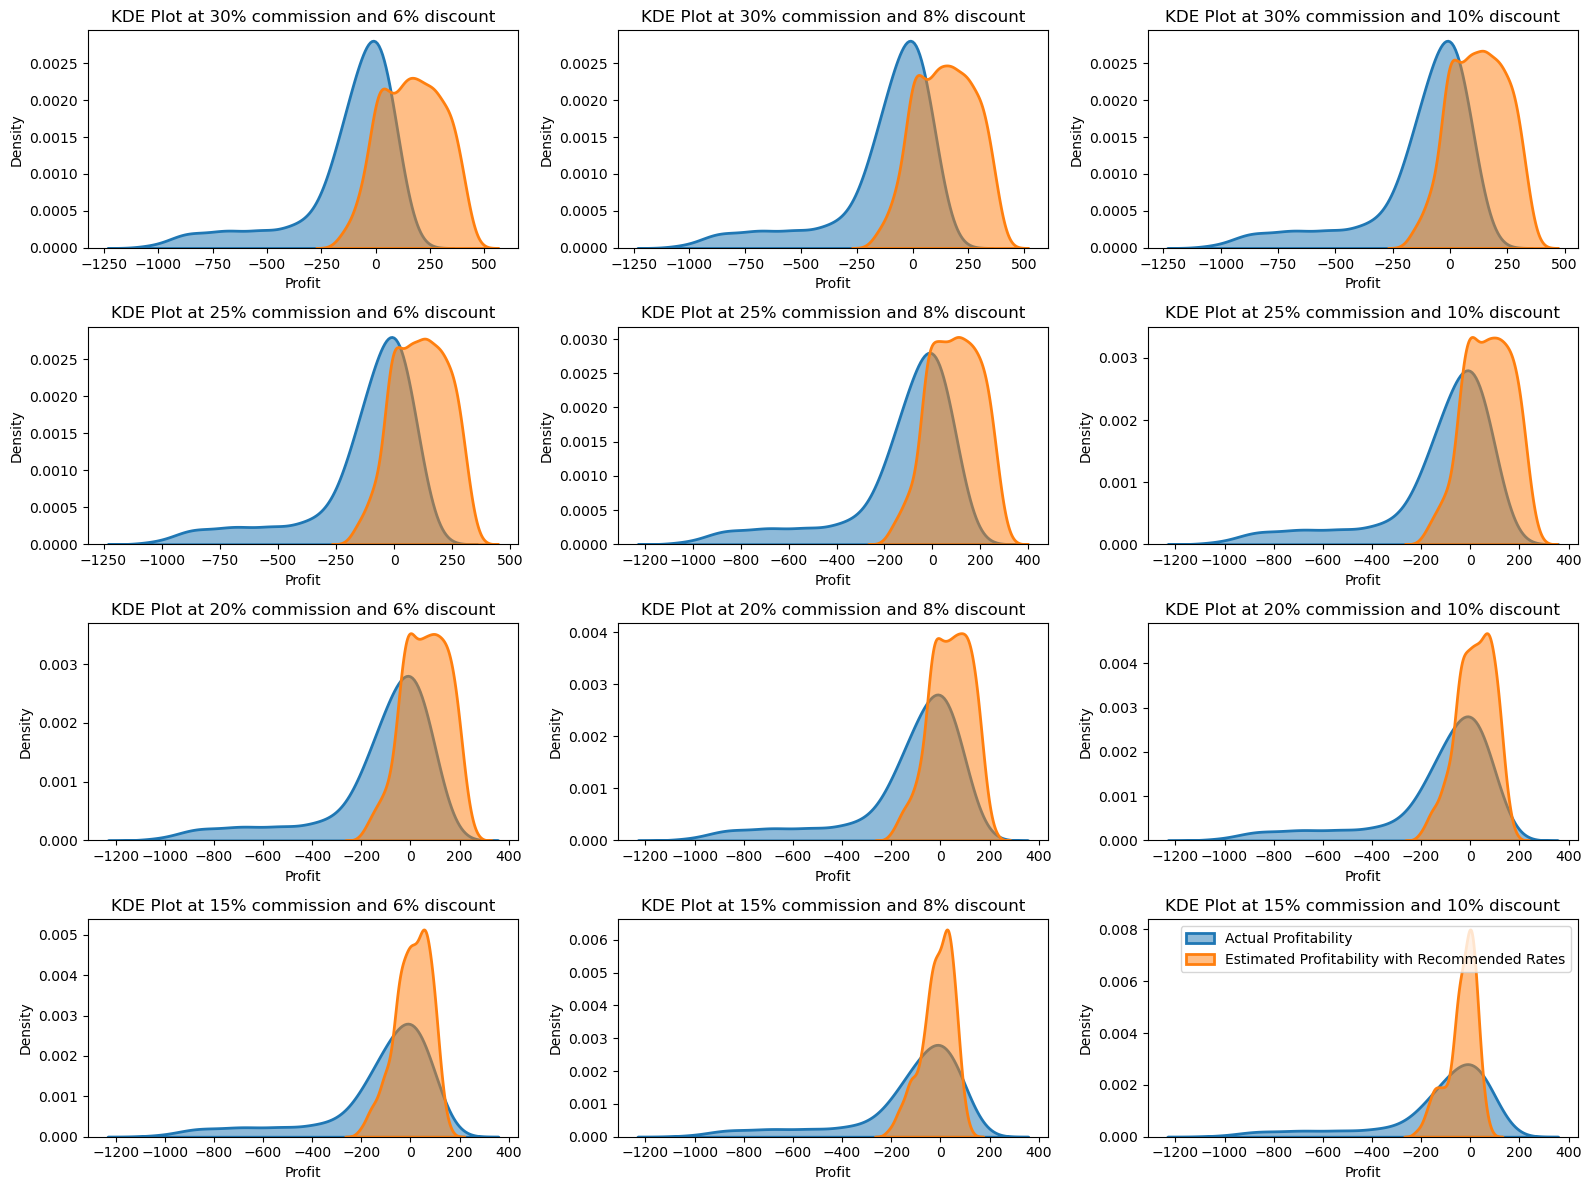

In [38]:
fig, axes = plt.subplots(4,3, figsize=(16,12))
for i in range(len(commission)):
    for j in range(len(discount)):
        ax = axes[i][j]
        sns.kdeplot(data['Profit'], label='Actual Profitability',ax=ax, fill=True, alpha=0.5, linewidth=2)
        sns.kdeplot(stimulated_data[f'Simulated Profit ({commission[i]}% and {discount[j]}%)'], label='Estimated Profitability with Recommended Rates', ax=ax,fill=True, alpha=0.5, linewidth=2)
        ax.set_title(f'KDE Plot at {commission[i]}% commission and {discount[j]}% discount')
plt.tight_layout()
plt.legend()
plt.show()

## Plotting the various combination of commission and discount percent on Bar plot to analyze the Total Revenue, Total profit

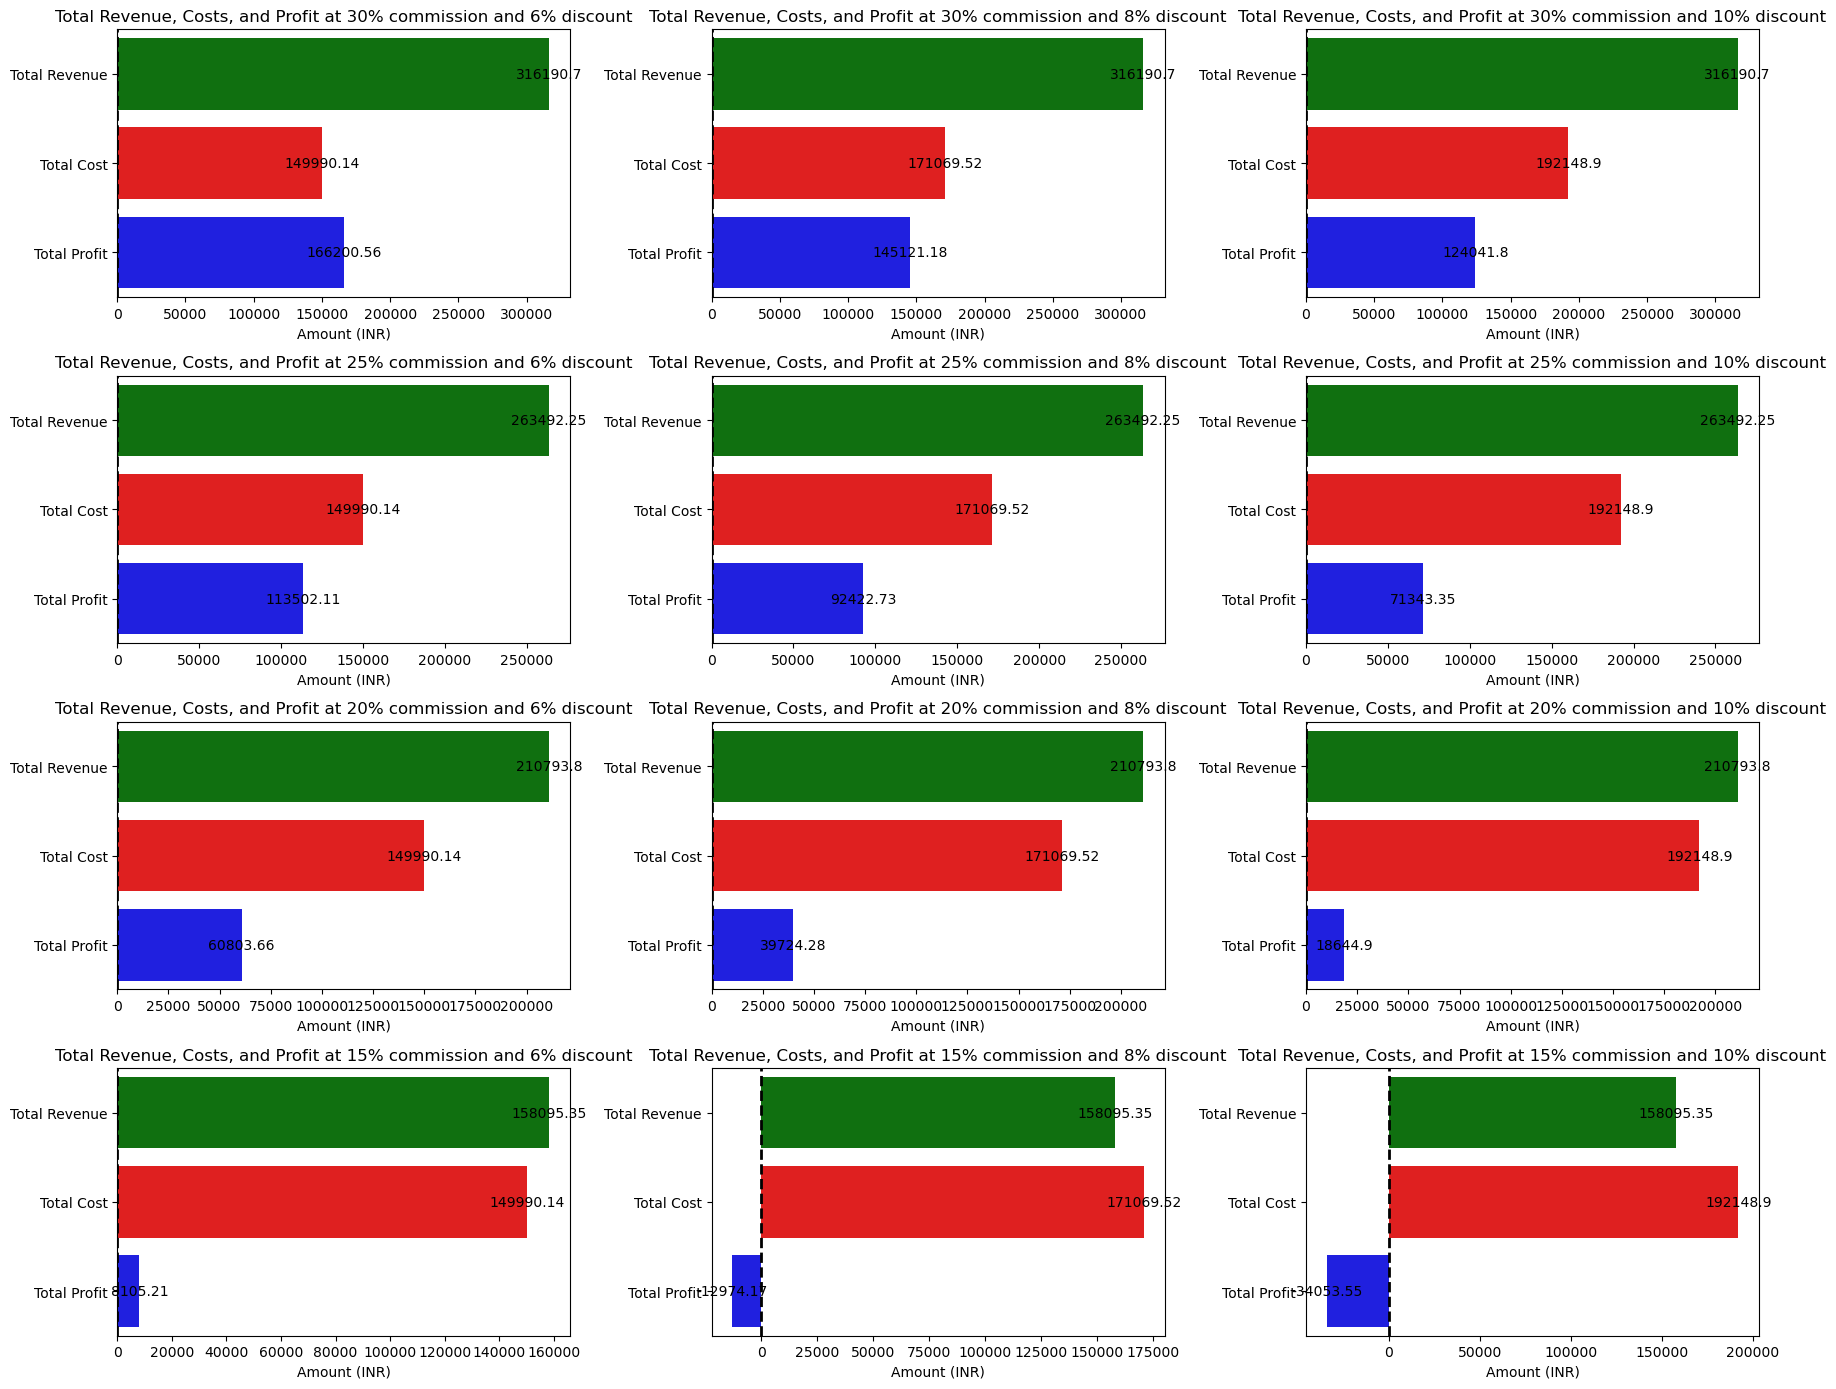

In [39]:
fig, axes = plt.subplots(4, 3, figsize=(18, 14))
for x in range(len(commission)):
    for y in range(len(discount)):
        ax = axes[x][y]
        totals = ['Total Revenue', 'Total Cost', 'Total Profit']
        Total_revenue = stimulated_data[f'Simulated Commission Fee ({commission[x]}% and {discount[y]}%)'].sum()
        Total_cost = stimulated_data[f'Simulated Total Cost ({commission[x]}% and {discount[y]}%)'].sum()
        Total_profits = stimulated_data[f'Simulated Profit ({commission[x]}% and {discount[y]}%)'].sum()
        values = [Total_revenue, Total_cost, Total_profits]
        
        sns.barplot(y=totals, x=values, ax=ax, palette=['green', 'red', 'blue'])
        
        for i in range(3):
            ax.text(values[i], i, str(round(values[i], 2)), ha='center', va='center')
        ax.axvline(0, color='black', linestyle='dashed', linewidth=2)
        ax.set_title(f'Total Revenue, Costs, and Profit at {commission[x]}% commission and {discount[y]}% discount')
        ax.set_xlabel('Amount (INR)')
        ax.set_ylabel('')
        
plt.tight_layout()
plt.show()


From the above Plots we analyze the impact of different commission percentage and average discount percent on the total revenue and total profit

From the above, commission percent of 25% and 8% average discount would be preferred

In [40]:
recommended_commission_percentage = 25 #25%
recommended_discount_percentage = 8 #8%

In [41]:
data['Stimulated Revenue'] = data['Order Value']*recommended_commission_percentage*0.01

C:\Users\Dell\AppData\Local\Temp\ipykernel_7600\97549040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Stimulated Revenue'] = data['Order Value']*recommended_commission_percentage*0.01


## For discount, we will use a funtion that generates 1000 different values between 5 to 20, whose average will be 8

In [42]:
import random

def generate_random_integers():
    numbers = [0] *10
    remaining_sum = recommended_discount_percentage*10
    while remaining_sum > 0:
        for i in range(10):
            if remaining_sum > 0:
                addition = random.randint(5, 20)
                addition = min(addition, remaining_sum)
                numbers[i] += addition
                remaining_sum -= addition
            if remaining_sum == 0:
                break
    random.shuffle(numbers)
    return numbers

In [43]:
random_integers = generate_random_integers()
print(random_integers)

[5, 13, 12, 9, 0, 0, 10, 16, 15, 0]


In [44]:
discount = []
for i in range(100):
    random_integers = generate_random_integers()
    discount.append(random_integers)

In [45]:
from pandas.core.common import flatten

In [46]:
discount_percent = list(flatten(discount))

In [47]:
df.columns

Index(['Order ID', 'Customer ID', 'Restaurant ID', 'Order Date and Time',
       'Delivery Date and Time', 'Order Value', 'Delivery Fee',
       'Payment Method', 'Discounts and Offers', 'Commission Fee',
       'Payment Processing Fee', 'Refunds/Chargebacks'],
      dtype='object')

In [48]:
final = df[['Order ID', 'Customer ID', 'Restaurant ID', 'Order Date and Time',
       'Delivery Date and Time', 'Order Value', 'Delivery Fee',
       'Payment Method','Payment Processing Fee', 'Refunds/Chargebacks']]

In [49]:
final['Commission Fee'] = final['Order Value']*recommended_commission_percentage*0.01

C:\Users\Dell\AppData\Local\Temp\ipykernel_7600\2245617678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Commission Fee'] = final['Order Value']*recommended_commission_percentage*0.01


## Checking if the discount percent has values less then 5 or greater then 25

In [50]:
len([x for x in discount_percent if x<5 and x!=0])

31

In [51]:
len([x for x in discount_percent if x>25])

0

## Converting the discounts less than 5% to 5%

In [52]:
discount_percent = [5 if x<5 and x!=0 else x for x in discount_percent]

In [53]:
#Converting the odd discounts numbers to even as, in my opinion, the odd discount percent doesn't sound well
discount_percent = [x+1 if x%2!=0 and x%5!=0 else x for x in discount_percent]

## Calculating the Discount Amounts for each order

In [54]:
final['Discount Percent'] = np.array(discount_percent)

In [55]:
final['Discount Amount'] = final['Order Value']*np.array(discount_percent)*0.01

In [56]:
np.array(discount_percent).mean()

8.325

In [57]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1000 non-null   int64         
 1   Customer ID             1000 non-null   object        
 2   Restaurant ID           1000 non-null   object        
 3   Order Date and Time     1000 non-null   datetime64[ns]
 4   Delivery Date and Time  1000 non-null   datetime64[ns]
 5   Order Value             1000 non-null   int64         
 6   Delivery Fee            1000 non-null   int64         
 7   Payment Method          1000 non-null   object        
 8   Payment Processing Fee  1000 non-null   int64         
 9   Refunds/Chargebacks     1000 non-null   int64         
 10  Commission Fee          1000 non-null   float64       
 11  Discount Percent        1000 non-null   int32         
 12  Discount Amount         1000 non-null   float64  

# Now we need to map the discounts as Offers

In [58]:
def map_offer(x):
    if (x['Discount Amount']) in list(range(45,61)): #Rounding the amount to 50 if the Discount Amount is closes to it
        return "Flat \u20B950 off"
    elif (x['Discount Amount']) in list(range(90,106)): #Rounding the amount to 100 if the Discount Amount is closes to it
        return "Flat \u20B9100 off"
    elif x['Discount Amount'] == 0: #Mapping the Offer as "No Discount"
        return "No Discount"
    else:
        return "Flat "+str(x['Discount Percent'])+"% off" #Mapping the Discount Percent as an offer

In [59]:
final['Discount and Offers'] = final.apply(map_offer,axis=1)

# Now changing the columns order of the dataset and removing the unnecessary columns

In [60]:
final.drop(['Discount Percent'],axis=1,inplace=True)

In [61]:
final.columns

Index(['Order ID', 'Customer ID', 'Restaurant ID', 'Order Date and Time',
       'Delivery Date and Time', 'Order Value', 'Delivery Fee',
       'Payment Method', 'Payment Processing Fee', 'Refunds/Chargebacks',
       'Commission Fee', 'Discount Amount', 'Discount and Offers'],
      dtype='object')

In [62]:
final = final[['Order ID', 'Customer ID', 'Restaurant ID', 'Order Date and Time',
       'Delivery Date and Time', 'Order Value', 'Delivery Fee',
       'Payment Method', 'Payment Processing Fee', 'Refunds/Chargebacks',
       'Commission Fee','Discount and Offers','Discount Amount']]

In [63]:
final

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Payment Processing Fee,Refunds/Chargebacks,Commission Fee,Discount and Offers,Discount Amount
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,47,0,478.50,Flat 6% off,114.84
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,23,0,246.50,No Discount,0.00
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,45,0,234.25,Flat 5% off,46.85
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,27,0,365.75,Flat 10% off,146.30
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50,0,498.00,Flat 8% off,159.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,47,50,206.25,Flat 5% off,41.25
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,42,0,406.75,Flat 6% off,97.62
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,553,20,Cash on Delivery,31,0,138.25,Flat 18% off,99.54
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,1414,0,Cash on Delivery,34,0,353.50,Flat 14% off,197.96


In [64]:
Total_orders_final = final.shape[0]
Total_revenue_final = final['Commission Fee'].sum()
Total_cost_final = (final['Discount Amount']+
                    final['Delivery Fee']+
                    final['Payment Processing Fee']+
                    final['Refunds/Chargebacks']).sum()
Total_profit_final = (final['Commission Fee'] - 
                      final['Discount Amount']-
                      final['Delivery Fee']-
                      final['Payment Processing Fee']-
                      final['Refunds/Chargebacks']).sum()

In [65]:
final_metrics = {
    "Total Orders" : Total_orders_final,
    "Total Cost" : Total_cost_final,
    "Total Revenue" : Total_revenue_final,
    "Total Profit" : Total_profit_final
}

In [66]:
final_metrics

{'Total Orders': 1000,
 'Total Cost': 172860.88,
 'Total Revenue': 263492.25,
 'Total Profit': 90631.37}

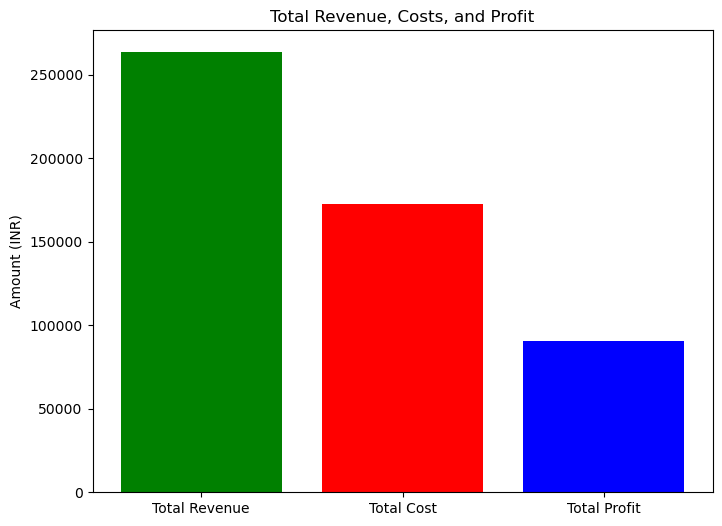

In [67]:
totals = ['Total Revenue', 'Total Cost', 'Total Profit']
values = [Total_revenue_final, Total_cost_final, Total_profit_final]

plt.figure(figsize=(8, 6))
plt.bar(totals, values, color=['green', 'red', 'blue'])
plt.title('Total Revenue, Costs, and Profit')
plt.ylabel('Amount (INR)')
plt.show()

In [76]:
print("The Profit is equal to ",(Total_profit_final/Total_revenue_final)*100,"%")

The Profit is equal to  34.39621848460438 %


In [74]:
print("The Total percent of profit increased is :",abs((Total_profit_final - Total_profits)/Total_profits)*100,"%")

The Total percent of profit increased is : 366.1436766504519 %


In [78]:
final.to_csv("Food_Delivery_NewDelhi_Orders.csv")

# Conclusion

### Food Delivery Cost and Profitability Analysis Project

**Description:**
Conducted a comprehensive financial analysis of a food delivery operation using Python to optimize costs and enhance profitability.

**Key Achievements:**
- Gathered and cleaned extensive operational data, ensuring consistency and accuracy.
- Extracted relevant features impacting costs and profitability.
- Analyzed direct (delivery fees, packaging) and indirect (discounts, commission fees) expenses.
- Calculated revenue and net profit for each order.
- Identified trends and patterns in profitability.

**Insights:**
- Determined that high discount rates were contributing to significant losses.
- Found that higher commission rates and lower discount percentages are key to profitability.
- Developed strategic recommendations to adjust commission and discount rates to optimal levels (30% commission, 6% discount).

**Technologies Used:**
- Python
- pandas
- Data visualization libraries (e.g., Matplotlib, Seaborn)

**Outcome:**
Simulated the financial impact of proposed changes, demonstrating a shift towards higher profitability per order. Provided actionable insights and strategic recommendations to improve overall profitability of the food delivery service.